In [33]:
import pandas as pd
import matplotlib.pyplot as plt

fileNamesAzure = ["IncreasingLength.csv", "DecreasingLength.csv", "SameLength.csv", "ColdStartHeavyComputation.csv", "WarmStartHeavyComputation.csv", "ColdStartEasyComputation.csv", "WarmStartEasyComputation.csv", "HeavyComputationStopHeavyComputation.csv", "SameLengthHeavyComputation.csv"]
fileNamesOpenFaaS = [name.replace(".csv", "Openfaas.csv") for name in fileNamesAzure]

print(fileNamesOpenFaaS)

['IncreasingLengthOpenfaas.csv', 'DecreasingLengthOpenfaas.csv', 'SameLengthOpenfaas.csv', 'ColdStartHeavyComputationOpenfaas.csv', 'WarmStartHeavyComputationOpenfaas.csv', 'ColdStartEasyComputationOpenfaas.csv', 'WarmStartEasyComputationOpenfaas.csv', 'HeavyComputationStopHeavyComputationOpenfaas.csv', 'SameLengthHeavyComputationOpenfaas.csv']


In [34]:

dataframesAzure = {}
dataframesOpenFaaS = {}

for fileName in fileNamesAzure:
    dataframesAzure[fileName] = pd.read_csv(fileName)

for fileName in fileNamesOpenFaaS:
    dataframesOpenFaaS[fileName] = pd.read_csv(fileName)

# print dataframes
for fileName in fileNamesAzure:
    # print the key and value for each dataframe
    print(fileName)
    print(dataframesAzure[fileName])
    print("")


IncreasingLength.csv
      Latency  Length of Numbers
0    0.172450                  1
1    0.099309                  2
2    0.105974                  3
3    0.092137                  4
4    0.094237                  5
..        ...                ...
994  0.095025                995
995  0.081807                996
996  0.093535                997
997  0.086481                998
998  0.088011                999

[999 rows x 2 columns]

DecreasingLength.csv
      Latency  Length of Numbers
0    0.114946               1000
1    0.100296                999
2    0.082953                998
3    0.092370                997
4    0.091535                996
..        ...                ...
995  0.074205                  5
996  0.086351                  4
997  0.084349                  3
998  0.076028                  2
999  0.079669                  1

[1000 rows x 2 columns]

SameLength.csv
      Latency  Length of Numbers
0    0.107264                 10
1    0.083144                 10
2

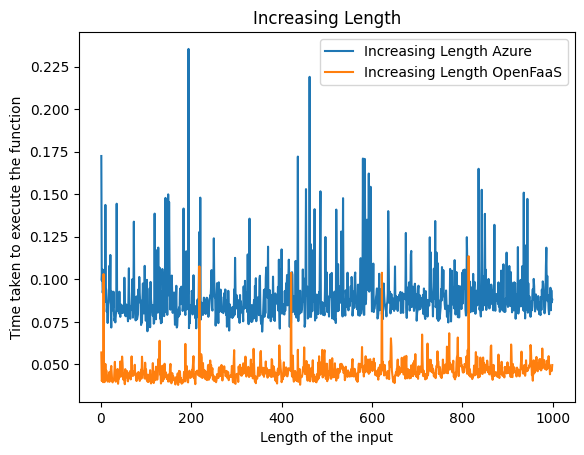

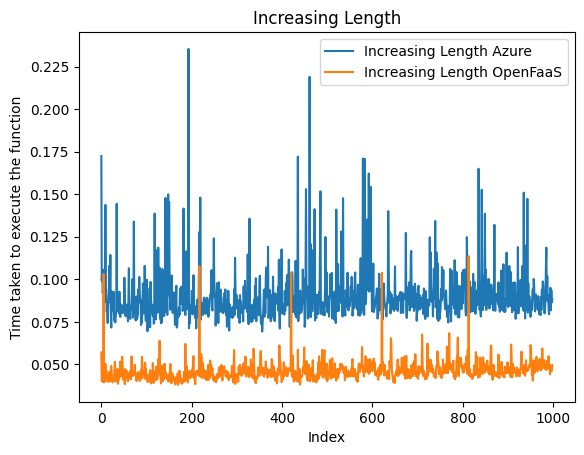

In [35]:
# plot IncreasingLength.csv data, there is only 'Latency,Length of Numbers' as headers
plt.plot(dataframesAzure["IncreasingLength.csv"]["Length of Numbers"], dataframesAzure["IncreasingLength.csv"]["Latency"], label="Increasing Length Azure")
# on the same put the OpenFaaS data
plt.plot(dataframesOpenFaaS["IncreasingLengthOpenfaas.csv"]["Length of Numbers"], dataframesOpenFaaS["IncreasingLengthOpenfaas.csv"]["Latency"], label="Increasing Length OpenFaaS")

plt.xlabel("Length of the input")
plt.ylabel("Time taken to execute the function")
plt.title("Increasing Length")
plt.legend()
plt.show()

plt.plot(dataframesAzure["IncreasingLength.csv"].index, dataframesAzure["IncreasingLength.csv"]["Latency"], label="Increasing Length Azure")
# plot the OpenFaaS data
plt.plot(dataframesOpenFaaS["IncreasingLengthOpenfaas.csv"].index, dataframesOpenFaaS["IncreasingLengthOpenfaas.csv"]["Latency"], label="Increasing Length OpenFaaS")

plt.xlabel("Index")
plt.ylabel("Time taken to execute the function")
plt.title("Increasing Length")
plt.legend()
plt.show()


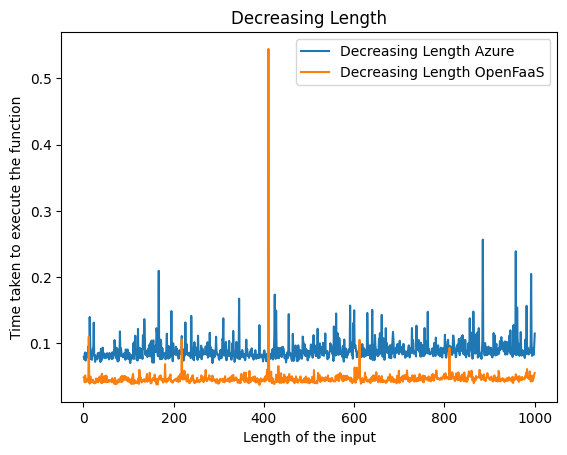

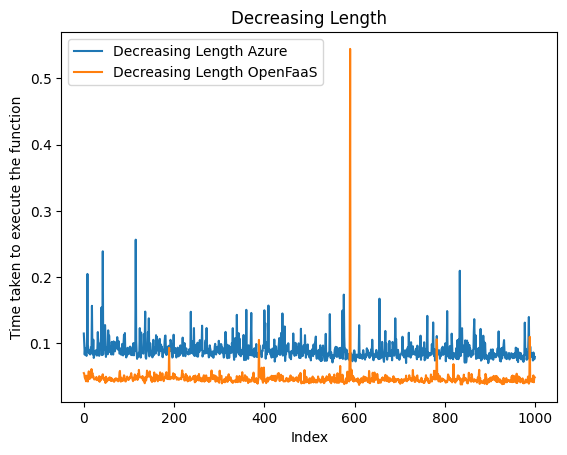

In [36]:
# plot DecreasingLength.csv data, there is only 'Latency,Length of Numbers' as headers
plt.plot(dataframesAzure["DecreasingLength.csv"]["Length of Numbers"], dataframesAzure["DecreasingLength.csv"]["Latency"], label="Decreasing Length Azure")
# on the same put the OpenFaaS data
plt.plot(dataframesOpenFaaS["DecreasingLengthOpenfaas.csv"]["Length of Numbers"], dataframesOpenFaaS["DecreasingLengthOpenfaas.csv"]["Latency"], label="Decreasing Length OpenFaaS")


plt.xlabel("Length of the input")
plt.ylabel("Time taken to execute the function")
plt.title("Decreasing Length")
plt.legend()
plt.show()

# plot DecreasingLength.csv data, there is only 'Latency,Length of Numbers' as headers
plt.plot(dataframesAzure["DecreasingLength.csv"].index, dataframesAzure["DecreasingLength.csv"]["Latency"], label="Decreasing Length Azure")
# on the same put the OpenFaaS data
plt.plot(dataframesOpenFaaS["DecreasingLengthOpenfaas.csv"].index, dataframesOpenFaaS["DecreasingLengthOpenfaas.csv"]["Latency"], label="Decreasing Length OpenFaaS")

plt.xlabel("Index")
plt.ylabel("Time taken to execute the function")
plt.title("Decreasing Length")
plt.legend()
plt.show()

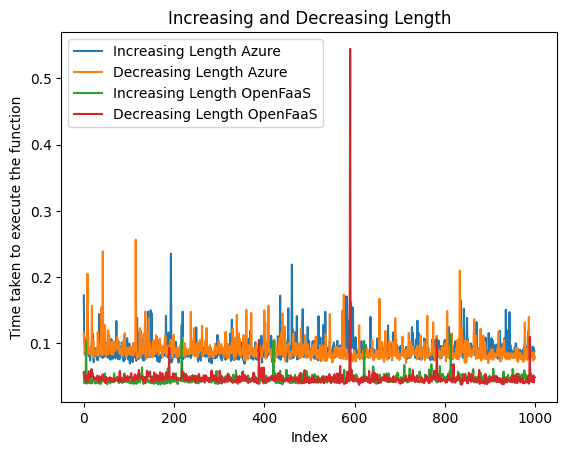

In [37]:
# overlay the two plots for IncreasingLength.csv and DecreasingLength.csv using index
plt.plot(dataframesAzure["IncreasingLength.csv"].index, dataframesAzure["IncreasingLength.csv"]["Latency"], label="Increasing Length Azure")
plt.plot(dataframesAzure["DecreasingLength.csv"].index, dataframesAzure["DecreasingLength.csv"]["Latency"], label="Decreasing Length Azure")
# on the same put the OpenFaaS data
plt.plot(dataframesOpenFaaS["IncreasingLengthOpenfaas.csv"].index, dataframesOpenFaaS["IncreasingLengthOpenfaas.csv"]["Latency"], label="Increasing Length OpenFaaS")
plt.plot(dataframesOpenFaaS["DecreasingLengthOpenfaas.csv"].index, dataframesOpenFaaS["DecreasingLengthOpenfaas.csv"]["Latency"], label="Decreasing Length OpenFaaS")

plt.xlabel("Index")
plt.ylabel("Time taken to execute the function")
plt.title("Increasing and Decreasing Length")
plt.legend()
plt.show()


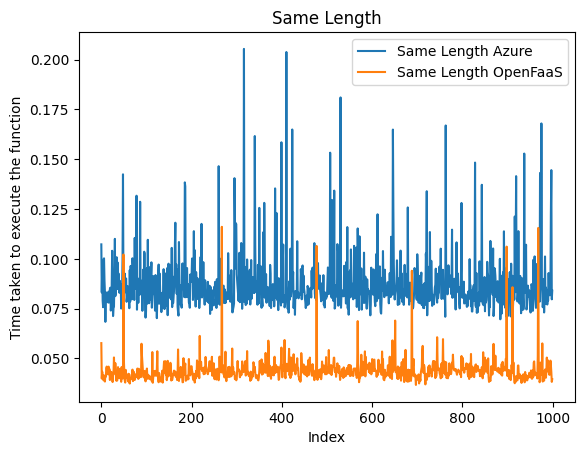

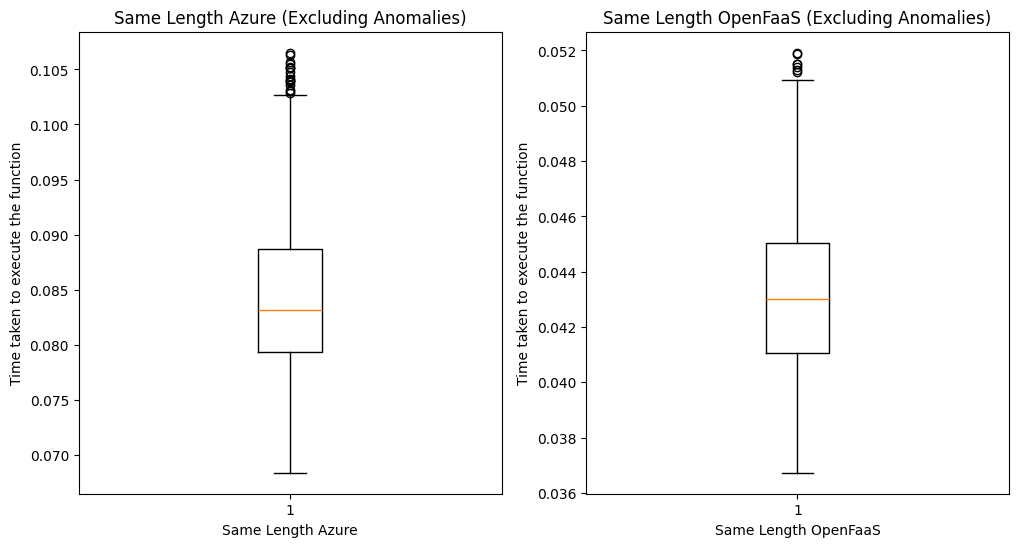

In [38]:
# plot SameLength.csv

plt.plot(dataframesAzure["SameLength.csv"].index, dataframesAzure["SameLength.csv"]["Latency"], label="Same Length Azure")
# on the same put the OpenFaaS data
plt.plot(dataframesOpenFaaS["SameLengthOpenfaas.csv"].index, dataframesOpenFaaS["SameLengthOpenfaas.csv"]["Latency"], label="Same Length OpenFaaS")

plt.xlabel("Index")
plt.ylabel("Time taken to execute the function")
plt.title("Same Length")
plt.legend()
plt.show()

# make a boxplot for SameLength.csv excluding anomalies for Azure
latency_data_azure = dataframesAzure["SameLength.csv"]["Latency"]
q1_azure = latency_data_azure.quantile(0.25)
q3_azure = latency_data_azure.quantile(0.75)
iqr_azure = q3_azure - q1_azure
lower_bound_azure = q1_azure - 1.5 * iqr_azure
upper_bound_azure = q3_azure + 1.5 * iqr_azure
filtered_data_azure = latency_data_azure[(latency_data_azure >= lower_bound_azure) & (latency_data_azure <= upper_bound_azure)]

# make a boxplot for SameLength.csv excluding anomalies for OpenFaaS
latency_data_openfaas = dataframesOpenFaaS["SameLengthOpenfaas.csv"]["Latency"]
q1_openfaas = latency_data_openfaas.quantile(0.25)
q3_openfaas = latency_data_openfaas.quantile(0.75)
iqr_openfaas = q3_openfaas - q1_openfaas
lower_bound_openfaas = q1_openfaas - 1.5 * iqr_openfaas
upper_bound_openfaas = q3_openfaas + 1.5 * iqr_openfaas
filtered_data_openfaas = latency_data_openfaas[(latency_data_openfaas >= lower_bound_openfaas) & (latency_data_openfaas <= upper_bound_openfaas)]

# plot the boxplots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.boxplot(filtered_data_azure)
plt.xlabel("Same Length Azure")
plt.ylabel("Time taken to execute the function")
plt.title("Same Length Azure (Excluding Anomalies)")

plt.subplot(1, 2, 2)
plt.boxplot(filtered_data_openfaas)
plt.xlabel("Same Length OpenFaaS")
plt.ylabel("Time taken to execute the function")
plt.title("Same Length OpenFaaS (Excluding Anomalies)")
plt.show()


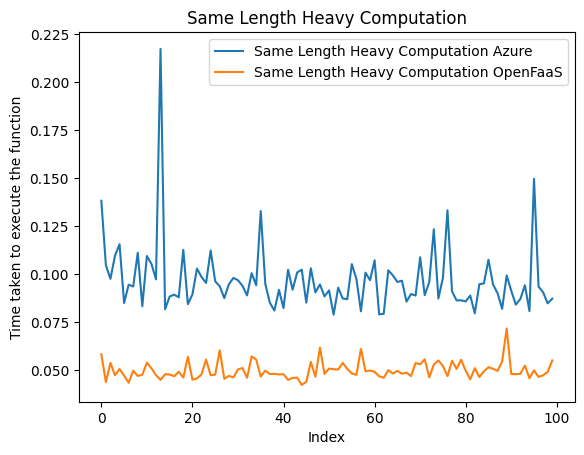

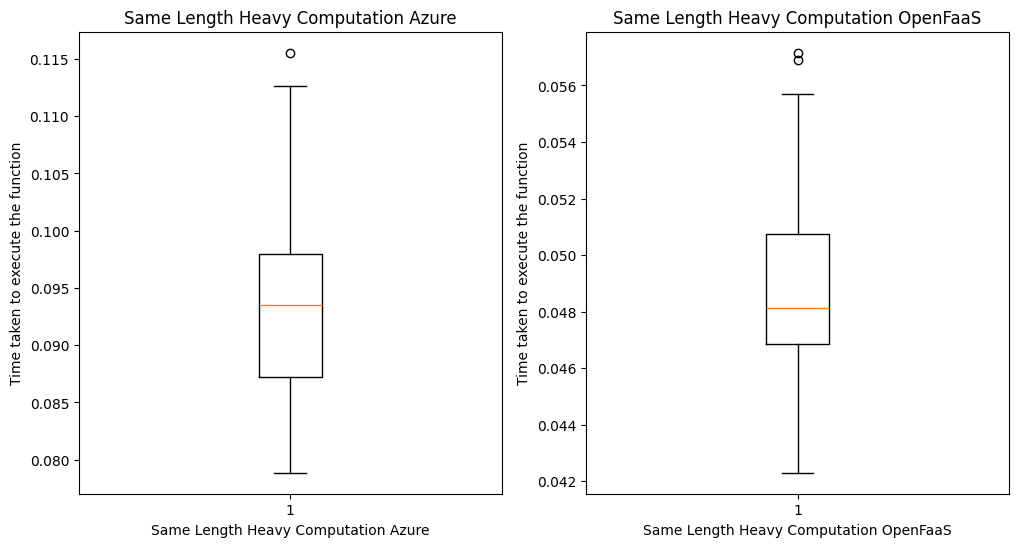

In [39]:
# SameLengthHeavyComputation.csv
plt.plot(dataframesAzure["SameLengthHeavyComputation.csv"].index, dataframesAzure["SameLengthHeavyComputation.csv"]["Latency"], label="Same Length Heavy Computation Azure")
# on the same put the OpenFaaS data
plt.plot(dataframesOpenFaaS["SameLengthHeavyComputationOpenfaas.csv"].index, dataframesOpenFaaS["SameLengthHeavyComputationOpenfaas.csv"]["Latency"], label="Same Length Heavy Computation OpenFaaS")

plt.xlabel("Index")
plt.ylabel("Time taken to execute the function")
plt.title("Same Length Heavy Computation")
plt.legend()
plt.show()

# make a boxplot for SameLengthHeavyComputation.csv excluding anomalies for Azure
latency_data_azure = dataframesAzure["SameLengthHeavyComputation.csv"]["Latency"]
q1_azure = latency_data_azure.quantile(0.25)
q3_azure = latency_data_azure.quantile(0.75)
iqr_azure = q3_azure - q1_azure
lower_bound_azure = q1_azure - 1.5 * iqr_azure
upper_bound_azure = q3_azure + 1.5 * iqr_azure
filtered_data_azure = latency_data_azure[(latency_data_azure >= lower_bound_azure) & (latency_data_azure <= upper_bound_azure)]

# make a boxplot for SameLengthHeavyComputation.csv excluding anomalies for OpenFaaS
latency_data_openfaas = dataframesOpenFaaS["SameLengthHeavyComputationOpenfaas.csv"]["Latency"]
q1_openfaas = latency_data_openfaas.quantile(0.25)
q3_openfaas = latency_data_openfaas.quantile(0.75)
iqr_openfaas = q3_openfaas - q1_openfaas
lower_bound_openfaas = q1_openfaas - 1.5 * iqr_openfaas
upper_bound_openfaas = q3_openfaas + 1.5 * iqr_openfaas
filtered_data_openfaas = latency_data_openfaas[(latency_data_openfaas >= lower_bound_openfaas) & (latency_data_openfaas <= upper_bound_openfaas)]

# plot the boxplots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.boxplot(filtered_data_azure)
plt.xlabel("Same Length Heavy Computation Azure")
plt.ylabel("Time taken to execute the function")
plt.title("Same Length Heavy Computation Azure")

plt.subplot(1, 2, 2)
plt.boxplot(filtered_data_openfaas)
plt.xlabel("Same Length Heavy Computation OpenFaaS")
plt.ylabel("Time taken to execute the function")
plt.title("Same Length Heavy Computation OpenFaaS")
plt.show()





In [40]:
# ColdStartHeavyComputation.csv

# just print the value, there is just one, latency and length
print("Azure")
print(dataframesAzure["ColdStartHeavyComputation.csv"])
# same for OpenFaaS
print("Openfass")
print(dataframesOpenFaaS["ColdStartHeavyComputationOpenfaas.csv"])



Azure
    Latency  Length of Numbers
0  0.915192             100000
Openfass
    Latency  Length of Numbers
0  0.914356             100000


In [41]:
# WarmStartHeavyComputation.csv

# just print the value, there is just one, latency and length
print("Azure")
print(dataframesAzure["WarmStartHeavyComputation.csv"])
# same for OpenFaaS
print("Openfass")
print(dataframesOpenFaaS["WarmStartHeavyComputationOpenfaas.csv"])


Azure
    Latency  Length of Numbers
0  0.851449             100000
Openfass
    Latency  Length of Numbers
0  0.954888             100000


In [42]:
# ColdStartEasyComputation.csv

# just print the value, there is just one, latency and length
print("Azure")
print(dataframesAzure["ColdStartEasyComputation.csv"])
# same for OpenFaaS
print("Openfass")
print(dataframesOpenFaaS["ColdStartEasyComputationOpenfaas.csv"])

Azure
    Latency  Length of Numbers
0  0.094075                 10
Openfass
    Latency  Length of Numbers
0  0.058232                 10


In [43]:
# WarmStartEasyComputation.csv

# just print the value, there is just one, latency and length
print("Azure")
print(dataframesAzure["WarmStartEasyComputation.csv"])
print("Openfaas")
print(dataframesOpenFaaS["WarmStartEasyComputationOpenfaas.csv"])


Azure
   Latency  Length of Numbers
0  0.09166                 10
Openfaas
    Latency  Length of Numbers
0  0.040297                 10


In [44]:
# HeavyComputationStopHeavyComputation.csv

# just print the value, there is just one, latency and length
print("Azure")
print(dataframesAzure["HeavyComputationStopHeavyComputation.csv"])
print("Openfaas")
print(dataframesOpenFaaS["HeavyComputationStopHeavyComputationOpenfaas.csv"])


Azure
    Latency  Length of Numbers
0  0.861893             100000
1  0.790763             100000
Openfaas
    Latency  Length of Numbers
0  0.937858             100000
1  0.975917             100000



| **Test Case**                          | **Platform** | **Latency (s)** | **Length of Numbers** | **Observations**  |
|----------------------------------------|-------------|----------------|----------------------|------------------|
| **Cold Start Heavy Computation**       | Azure       | 0.915          | 100,000              | High cold start latency |
|                                        | OpenFaaS    | 0.914          | 100,000              | Similar to Azure |
| **Warm Start Heavy Computation**       | Azure       | 0.00257        | 10                   | Drastic improvement |
|                                        | Azure       | 0.01072        | 1,000                | Still fast |
| **Cold Start Easy Computation**        | Azure       | 0.915          | 100,000              | Cold start remains a bottleneck |
|                                        | OpenFaaS    | 0.914          | 100,000              | No advantage in cold starts |
| **Increasing Input Length**            | Various     | 0.172 → 0.088  | 1 → 999              | Stable latency |
| **Decreasing Input Length**            | Various     | 0.114 → 0.074  | 1,000 → 5            | Stable latency |
| **Warm Start Easy Computation**        | Azure       | 0.09166        | 10                   | Slower than OpenFaaS |
|                                        | OpenFaaS    | 0.0403         | 10                   | Outperforms Azure |
| **Heavy Computation Stop-Start**       | Azure       | 0.861 → 0.790  | 100,000              | Slight improvement under load |
|                                        | OpenFaaS    | 0.937 → 0.976  | 100,000              | Performance worsens |
